# Insurance Claims- Fraud Detection



## Importing necessary libraries

In [5]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()
import warnings 
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from sklearn.metrics import classification_report


# Reading Data Frame

In [6]:
df = pd.read_csv('Automobile_insurance_fraud.csv')

# Checking the data overview

In [7]:
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


# Checking data information

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

### Checking the column _c39

In [9]:
df['_c39'].unique()

array([nan])

As I can see all the values are null in this columns hence I am dropping it

In [10]:
df.drop('_c39',axis=1,inplace=True)

In [11]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


# Lets see the Data types of the columns

In [12]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

# Lets check the null values

In [13]:
df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

# Lets Check the uniqueness of each column having Object datatype

In [14]:
colum_name =[]
unique_value=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        colum_name.append(str(col)) 
        unique_value.append(df[col].nunique())
table= pd.DataFrame()
table['Col_name'] = colum_name
table['Value']= unique_value
            
table=table.sort_values('Value',ascending=False)
table

,Col_name,Value
15,incident_location,1000
0,policy_bind_date,951
8,incident_date,60
19,auto_model,39
6,insured_hobbies,20
18,auto_make,14
5,insured_occupation,14
4,insured_education_level,7
14,incident_city,7
13,incident_state,7


In [15]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [16]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [17]:
df['insured_sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)


#- Incident_location, Policy Bind Date, Incident date, Auto Model are having high unique count so we dropping that column

###  droping columns based on above result

In [18]:
df.drop(['incident_location','policy_bind_date','incident_date','auto_model'],axis=1,inplace=True)

In [19]:
df.shape

(1000, 35)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_state                 1000 non-null   object 
 4   policy_csl                   1000 non-null   object 
 5   policy_deductable            1000 non-null   int64  
 6   policy_annual_premium        1000 non-null   float64
 7   umbrella_limit               1000 non-null   int64  
 8   insured_zip                  1000 non-null   int64  
 9   insured_sex                  1000 non-null   object 
 10  insured_education_level      1000 non-null   object 
 11  insured_occupation           1000 non-null   object 
 12  insured_hobbies              1000 non-null   object 
 13  insured_relationshi

In [21]:
df.head(5)

,months_as_customer,age,policy_number,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,521585,OH,250/500,1000,1406.91,0,466132,MALE,...,1,2,YES,71610,6510,13020,52080,Saab,2004,Y
1,228,42,342868,IN,250/500,2000,1197.22,5000000,468176,MALE,...,0,0,?,5070,780,780,3510,Mercedes,2007,Y
2,134,29,687698,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,2,3,NO,34650,7700,3850,23100,Dodge,2007,N
3,256,41,227811,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,1,2,NO,63400,6340,6340,50720,Chevrolet,2014,Y
4,228,44,367455,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,0,1,NO,6500,1300,650,4550,Accura,2009,N


 Policy Number is unique for every policy... So dropping it as it would be not required for prediction

In [22]:
df.drop(["policy_number"],axis=1,inplace=True)

In [23]:
df.describe()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


# Correlation between the columns

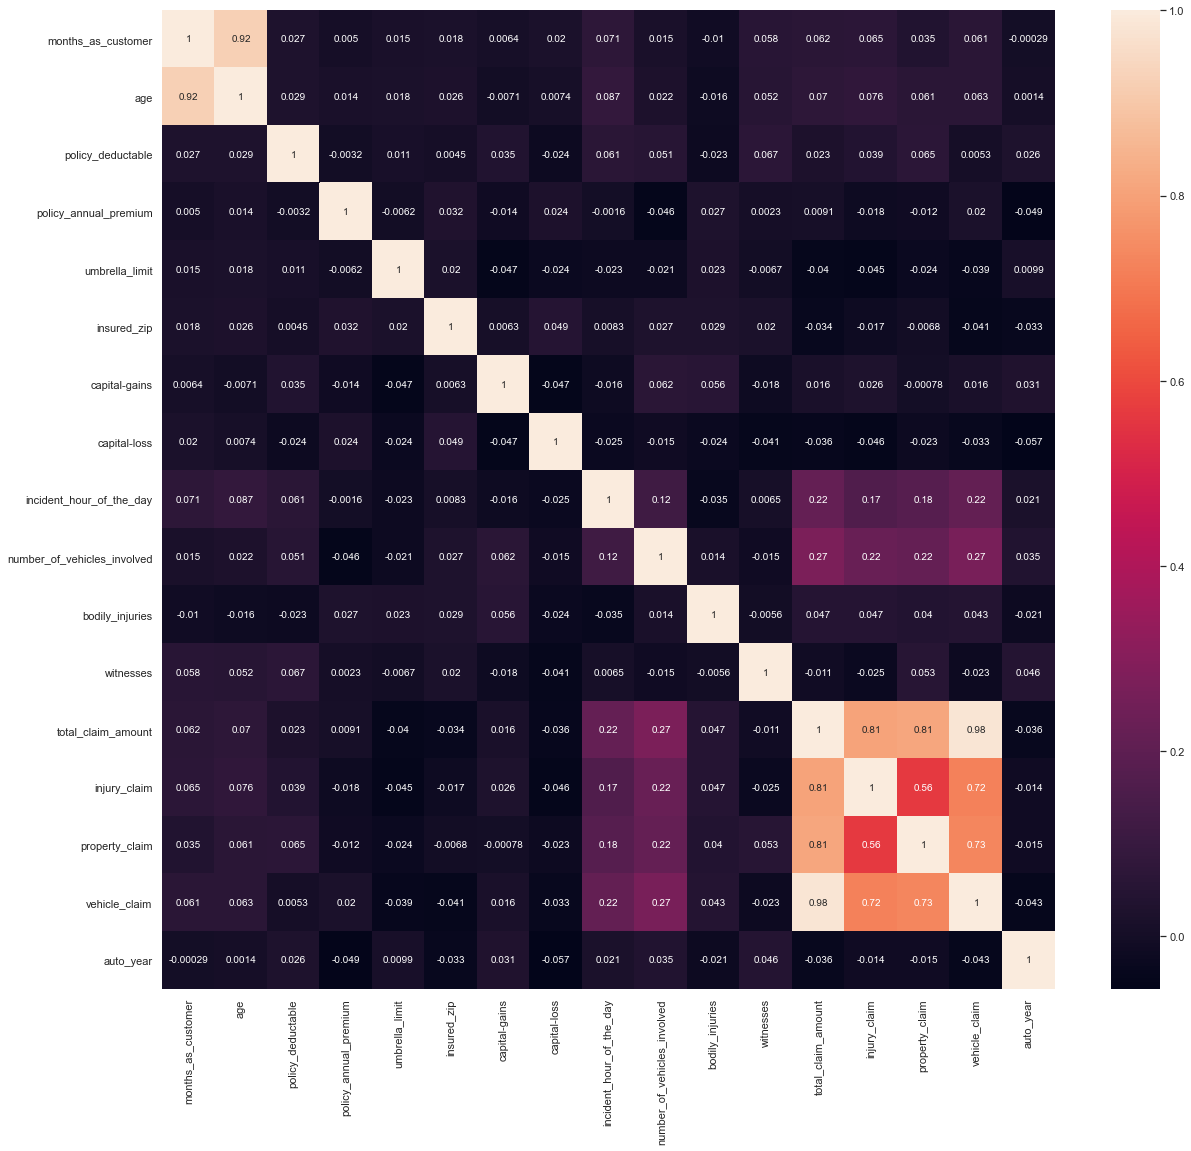

In [24]:
plt.figure(figsize=(20,18))
sns.heatmap(df.corr(),annot=True);


- Injury claim and totalclaim amount is 81% correlated
- Property claim and totalclaim amount is 81% correlated
- Vehicle claim and total claim amount is 98% correlated
-  Injury claim and vehicle claim is  73% correlated
- property clain and vehicle claim is 73% correlated

# Visualization of Data

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_state                 1000 non-null   object 
 3   policy_csl                   1000 non-null   object 
 4   policy_deductable            1000 non-null   int64  
 5   policy_annual_premium        1000 non-null   float64
 6   umbrella_limit               1000 non-null   int64  
 7   insured_zip                  1000 non-null   int64  
 8   insured_sex                  1000 non-null   object 
 9   insured_education_level      1000 non-null   object 
 10  insured_occupation           1000 non-null   object 
 11  insured_hobbies              1000 non-null   object 
 12  insured_relationship         1000 non-null   object 
 13  capital-gains      

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

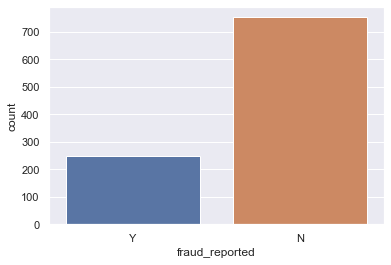

In [26]:
sns.countplot(x=df["fraud_reported"])

#### Observation- 
- Fraud reported has no count- 700
- Fraud reprted has yes count - 200

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

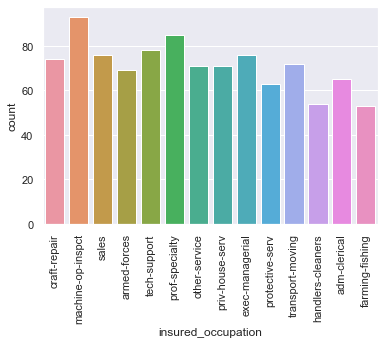

In [27]:
sns.countplot(x=df["insured_occupation"])
plt.xticks(rotation=90)

#### Observation- machine-op-inspct has highest count and farming-fishing has least count

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

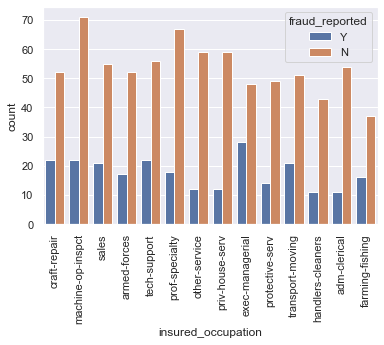

In [28]:
sns.countplot(df['insured_occupation'],hue=df['fraud_reported'])
plt.xticks(rotation=90)

machine-op-inspct has least fraud cases and exec-managerial has highest fraud cases 

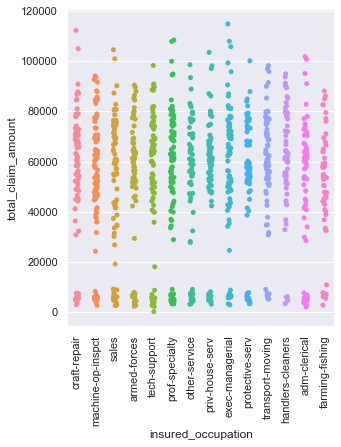

In [29]:
sns.catplot(x="insured_occupation",y="total_claim_amount",data=df)
plt.xticks(rotation=90)
plt.show()

Highest claims has been done by executive manager

<AxesSubplot:xlabel='insured_sex', ylabel='total_claim_amount'>

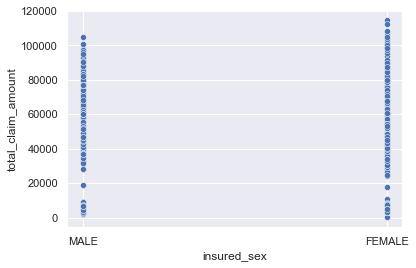

In [30]:
sns.scatterplot(df['insured_sex'],df['total_claim_amount'], data=df)

 Female claimed the most amount

### distribution of various columns dependent to generate fraud report

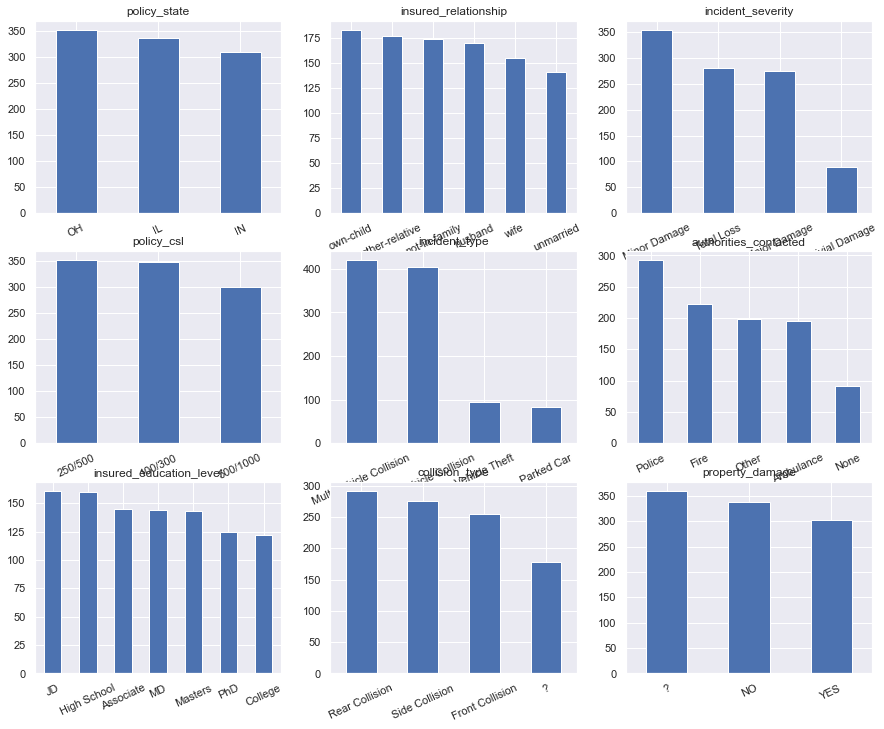

In [31]:
a = ['policy_state','policy_csl','insured_education_level',
           'insured_relationship','incident_type','collision_type','incident_severity','authorities_contacted','property_damage']

fig, axes = plt.subplots(nrows = 3,ncols = 3,figsize = (15,12))
for i, item in enumerate(a):
    if i < 3:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i,0],rot = 25)
        
    elif i >=3 and i < 6:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-3,1],rot = 25)
        
    elif i < 9:
        ax = df[item].value_counts().plot(kind = 'bar',ax=axes[i-6,2],rot = 25)
    ax.set_title(item) 

# Scatter Plot for checking the Correlation

In [32]:
y= df['fraud_reported']
x= df.drop(['fraud_reported'], axis =1)

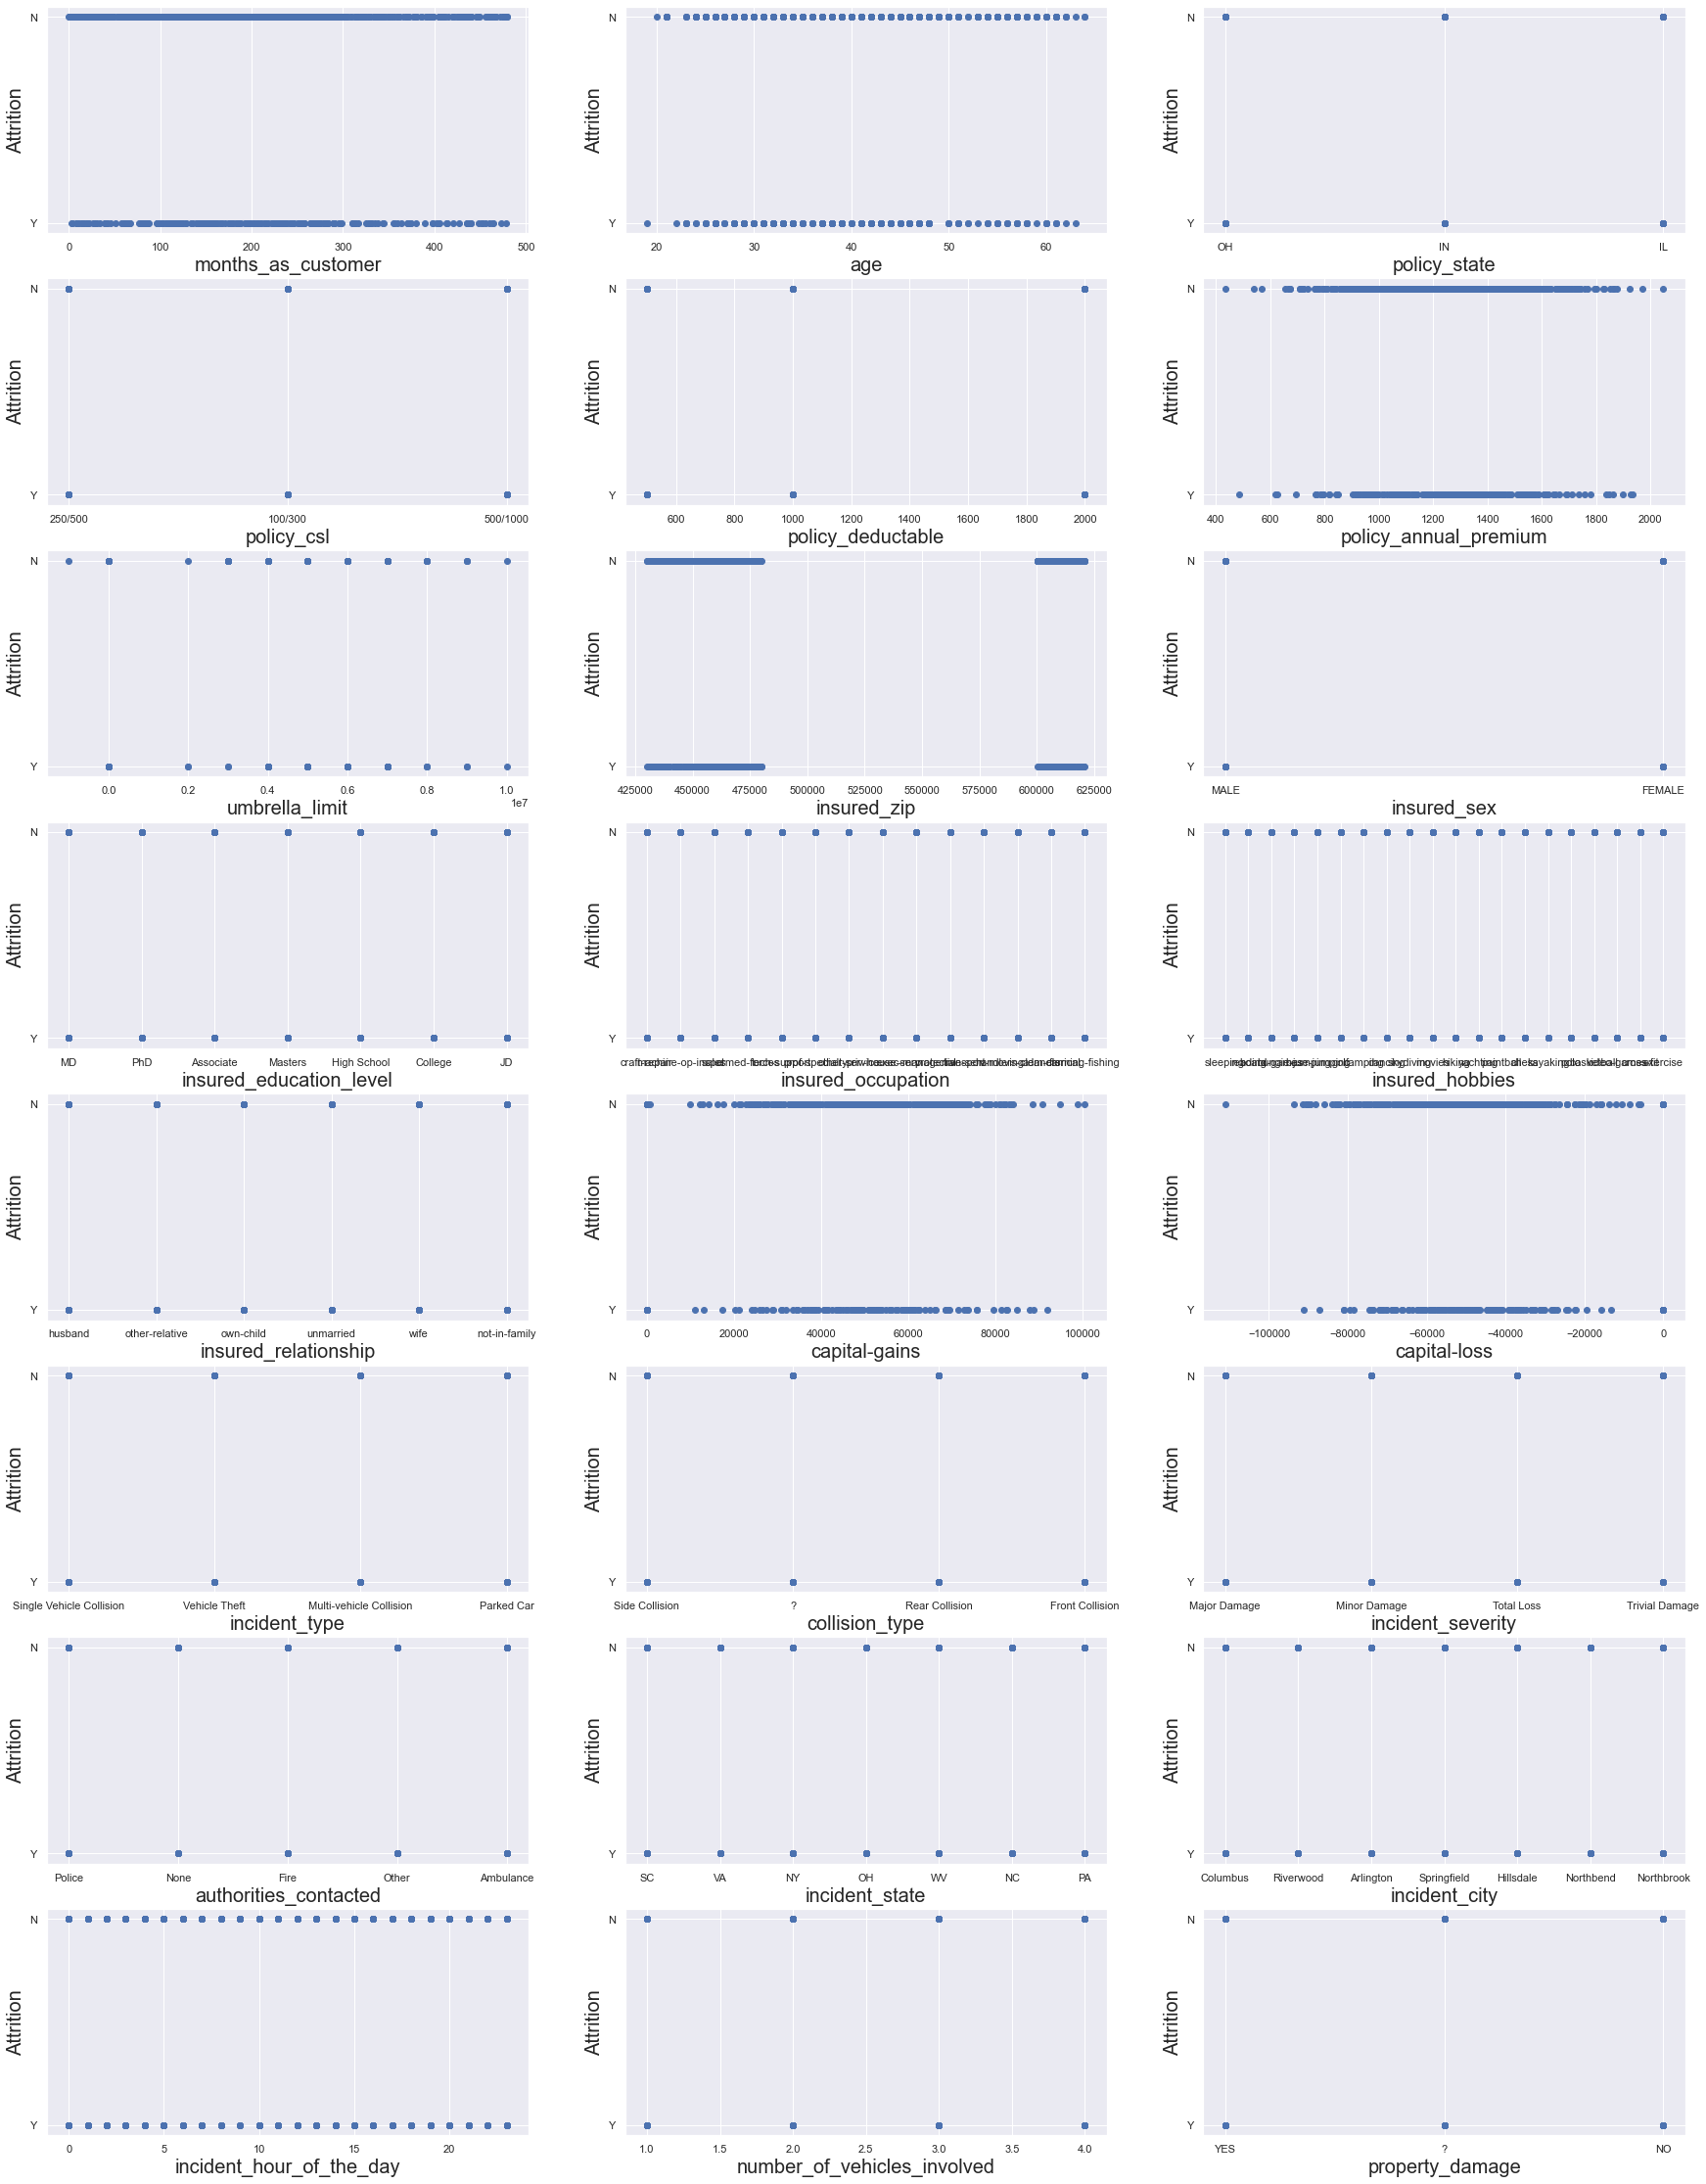

In [33]:
plt.figure(figsize =(30,40),facecolor ='white')
plotnumber = 1
for column in df:
    if plotnumber<=24:
        ax =plt.subplot(8,3,plotnumber)
        plt.scatter(df[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Attrition',fontsize=20)
    plotnumber +=1
plt.show()

In [34]:
df.shape

(1000, 34)

# Label Encoder to convert the dataset to numerical

In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [36]:
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col] = le.fit_transform(df[col])

In [37]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int32
policy_csl                       int32
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int32
insured_education_level          int32
insured_occupation               int32
insured_hobbies                  int32
insured_relationship             int32
capital-gains                    int64
capital-loss                     int64
incident_type                    int32
collision_type                   int32
incident_severity                int32
authorities_contacted            int32
incident_state                   int32
incident_city                    int32
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                  int32
bodily_injuries                  int64
witnesses                

In [38]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_year,fraud_reported
0,328,48,2,1,1000,1406.91,0,466132,1,4,...,1,2,2,71610,6510,13020,52080,10,2004,1
1,228,42,1,1,2000,1197.22,5000000,468176,1,4,...,0,0,0,5070,780,780,3510,8,2007,1
2,134,29,2,0,2000,1413.14,5000000,430632,0,6,...,2,3,1,34650,7700,3850,23100,4,2007,0
3,256,41,0,1,2000,1415.74,6000000,608117,0,6,...,1,2,1,63400,6340,6340,50720,3,2014,1
4,228,44,0,2,1000,1583.91,6000000,610706,1,0,...,0,1,1,6500,1300,650,4550,0,2009,0


# Normal Distribution

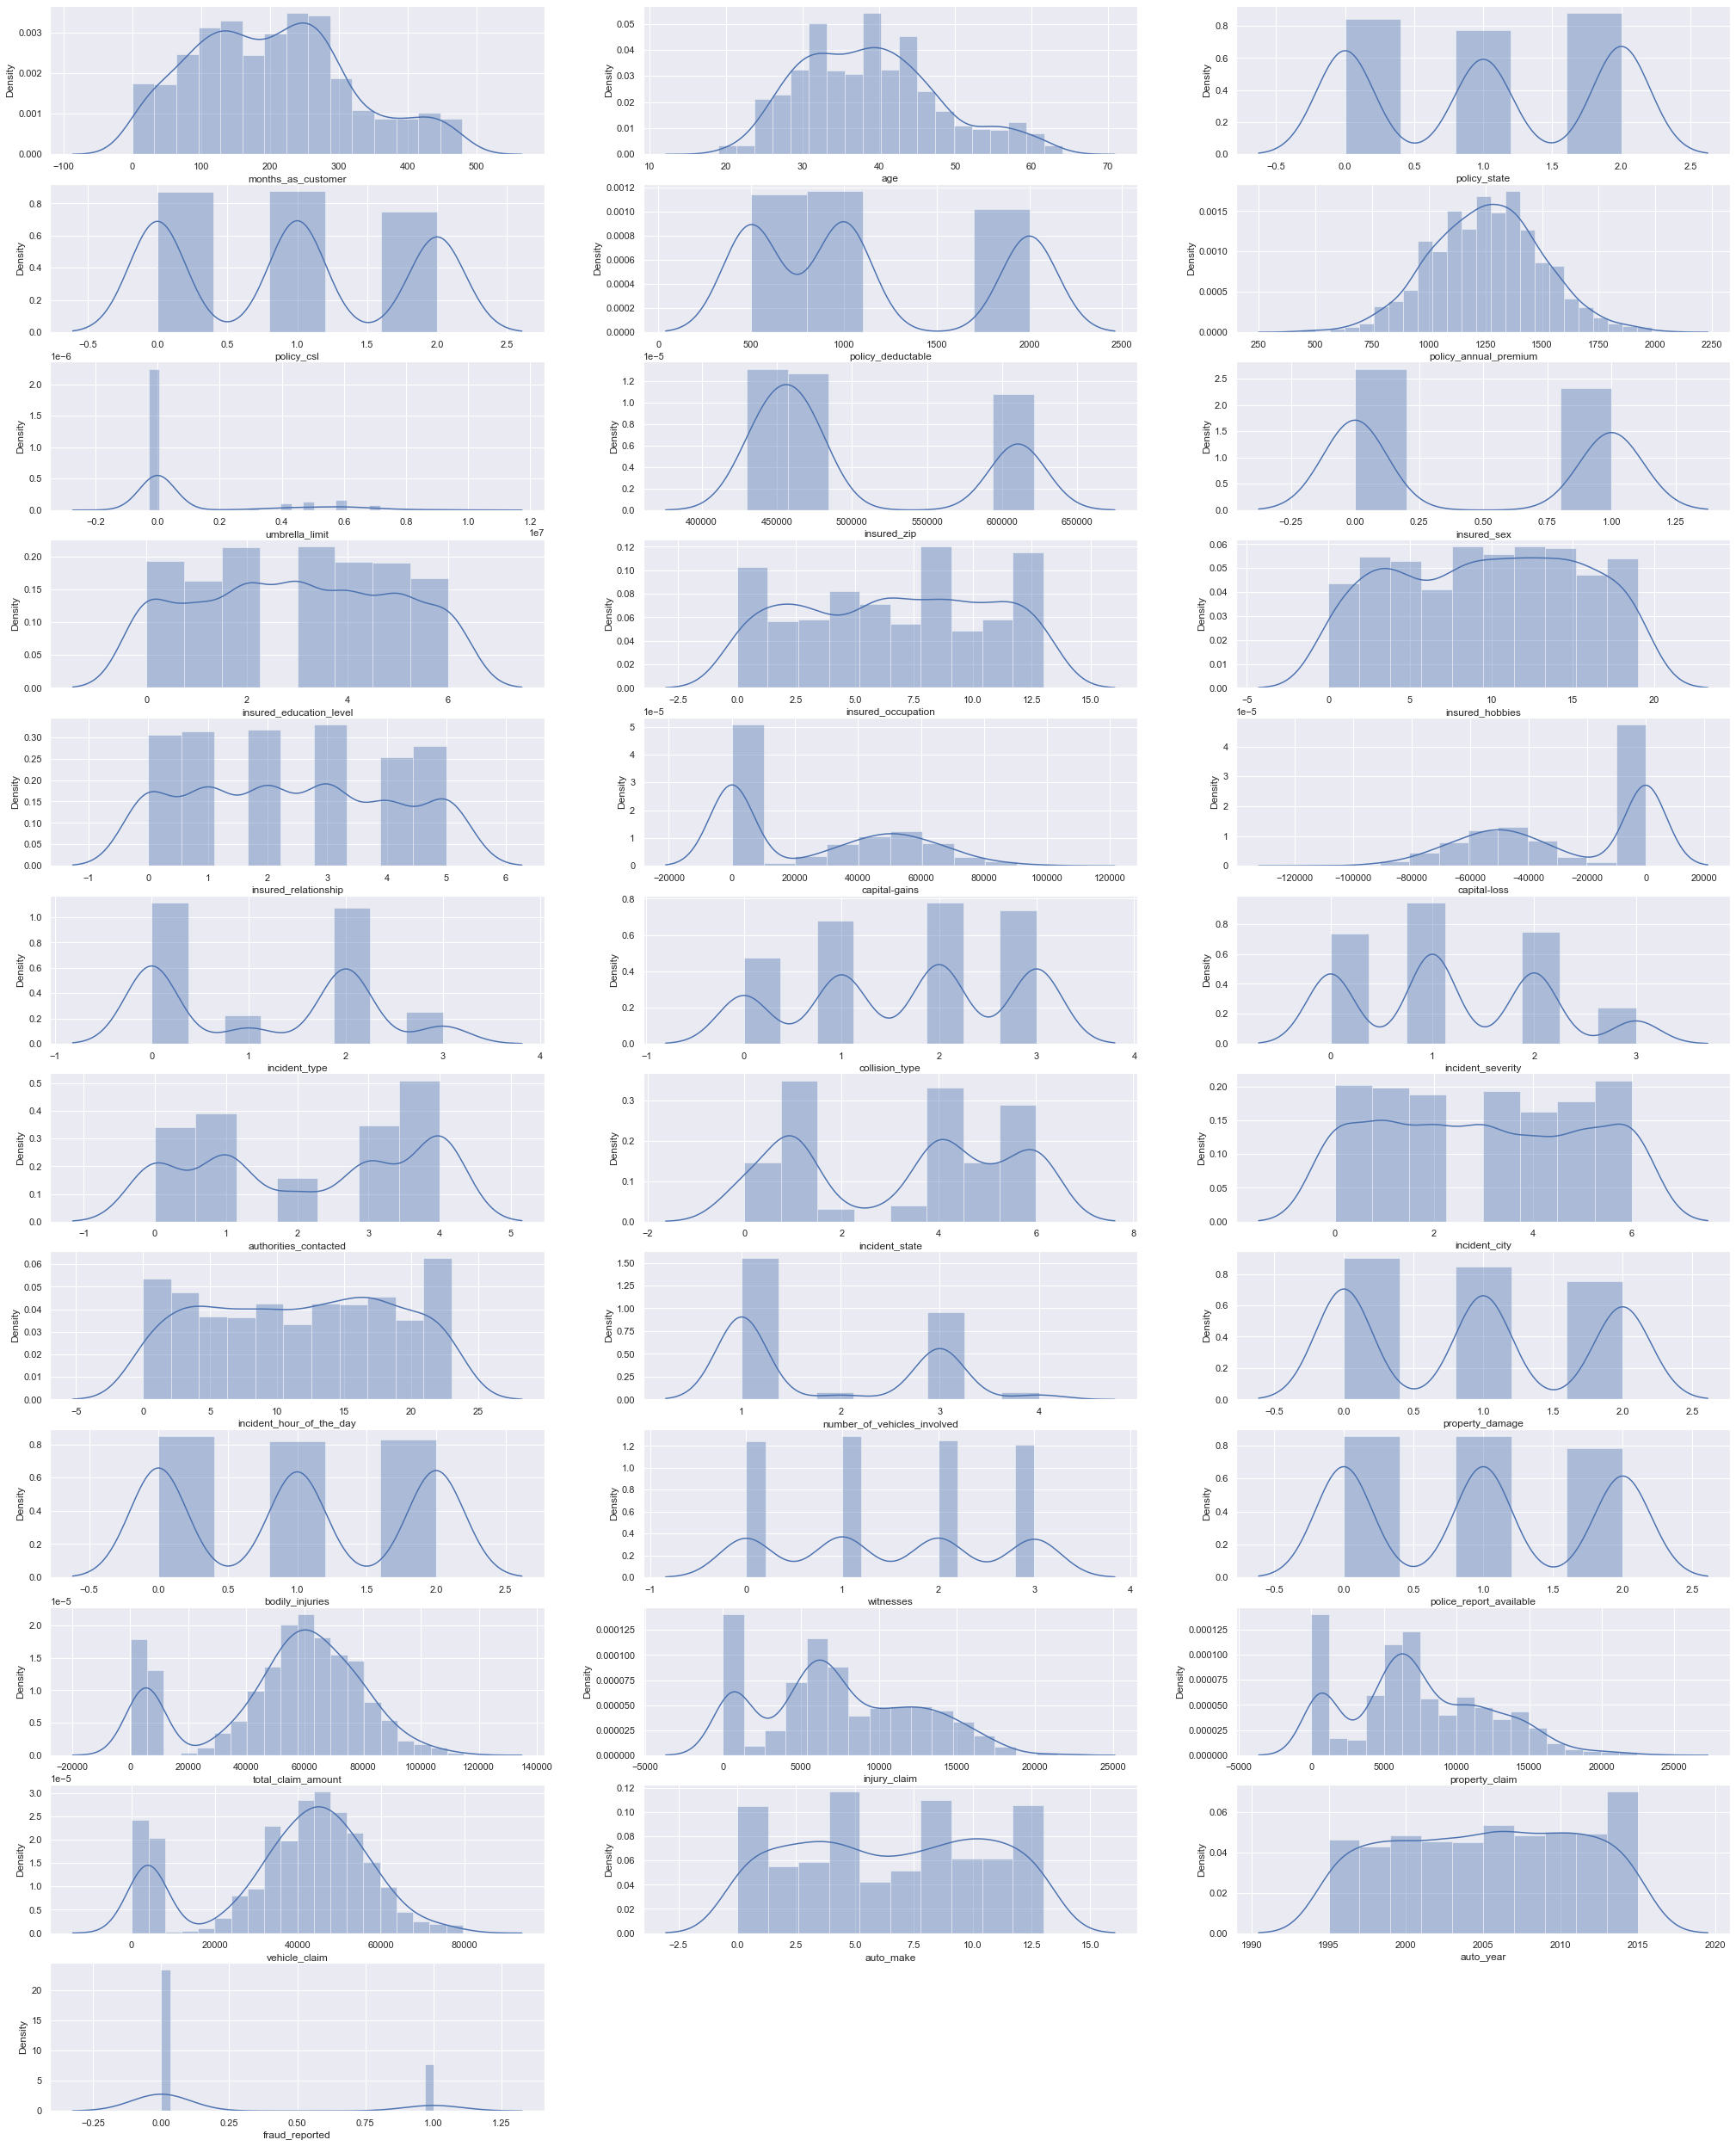

In [39]:
plt.figure(figsize=(35,45))
plotnumber =1

for column in df:
    if plotnumber <= 34:
        ax = plt.subplot(12,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column) 
    plotnumber+=1
plt.show()

# Checking the Skewness

In [40]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.106418
bodily_injuries                0.014777


####  range as +0.5 to -0.5

Skewness is looking fine for me

# Using Boxplot to check the outliers

months_as_customer                AxesSubplot(0.125,0.749828;0.0945122x0.130172)
age                            AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
policy_state                   AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
policy_csl                     AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
policy_deductable              AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
policy_annual_premium          AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
umbrella_limit                 AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
insured_zip                       AxesSubplot(0.125,0.593621;0.0945122x0.130172)
insured_sex                    AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
insured_education_level        AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
insured_occupation             AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
insured_hobbies                AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
insured_relationship        

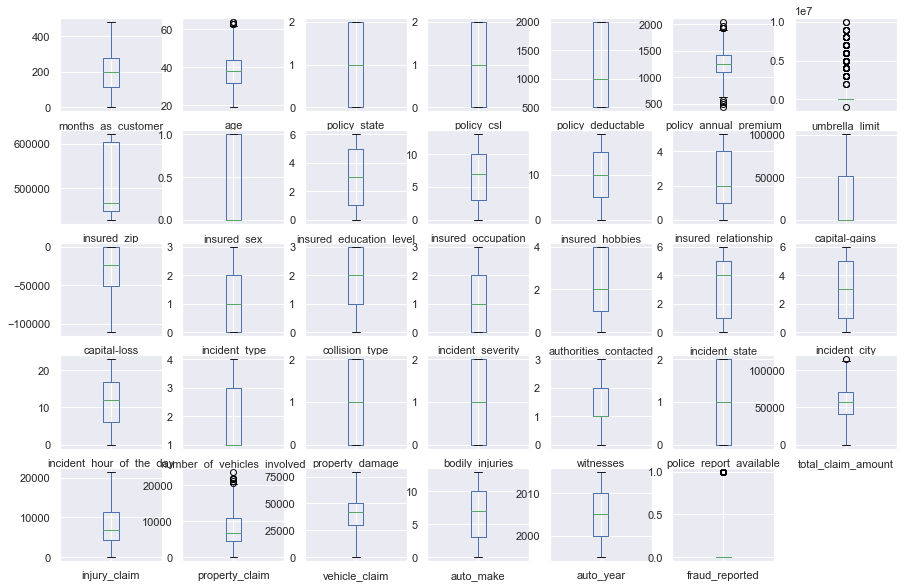

In [41]:
df.plot(kind='box',subplots=True, layout=(5,7),figsize=(15,10))

### outliers are :
- Umbrella limit
- policy annual premium
- age
- property claim

# Removing Outliers:

In [42]:
df.shape

(1000, 34)

In [43]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
z.shape

(1000, 34)

In [44]:
threshold =3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 29,  6,  6,  6,  5, 14,
        6,  6,  6], dtype=int64))


In [45]:
df_new_z=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new_z.shape)

(1000, 34)
(980, 34)


### Total loss of Data

In [46]:
loss_percentage=(1000-980)/1000*100
print(loss_percentage)

2.0


Observation - 2% of data has been lost after zscore

months_as_customer                AxesSubplot(0.125,0.749828;0.0945122x0.130172)
age                            AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
policy_state                   AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
policy_csl                     AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
policy_deductable              AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
policy_annual_premium          AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
umbrella_limit                 AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
insured_zip                       AxesSubplot(0.125,0.593621;0.0945122x0.130172)
insured_sex                    AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
insured_education_level        AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
insured_occupation             AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
insured_hobbies                AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
insured_relationship        

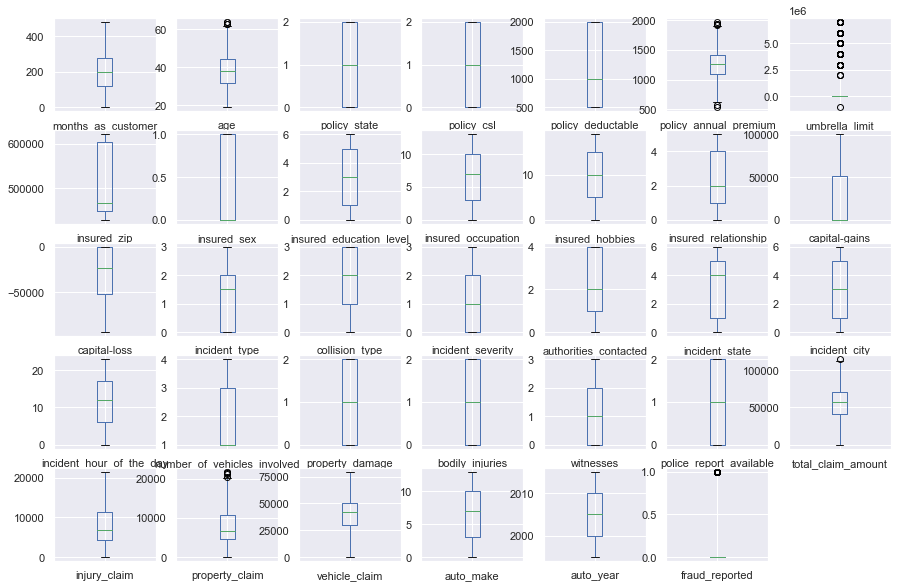

In [47]:
df_new_z.plot(kind='box',subplots=True, layout=(5,7),figsize=(15,10))

#### Most of the Outliers are removed now

## Dropping the columns having 70% correlated

In [48]:
X= df_new_z.drop("fraud_reported",axis=1)
y=df_new_z["fraud_reported"]

In [49]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [50]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [51]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

5

## Checking the columns having more than 70% correaltion and dropping them

In [52]:
corr_features

{'age',
 'injury_claim',
 'number_of_vehicles_involved',
 'property_claim',
 'vehicle_claim'}

In [53]:
df_new_z=df_new_z.drop(corr_features,axis=1)

# Checking the Heatmap for correlation again

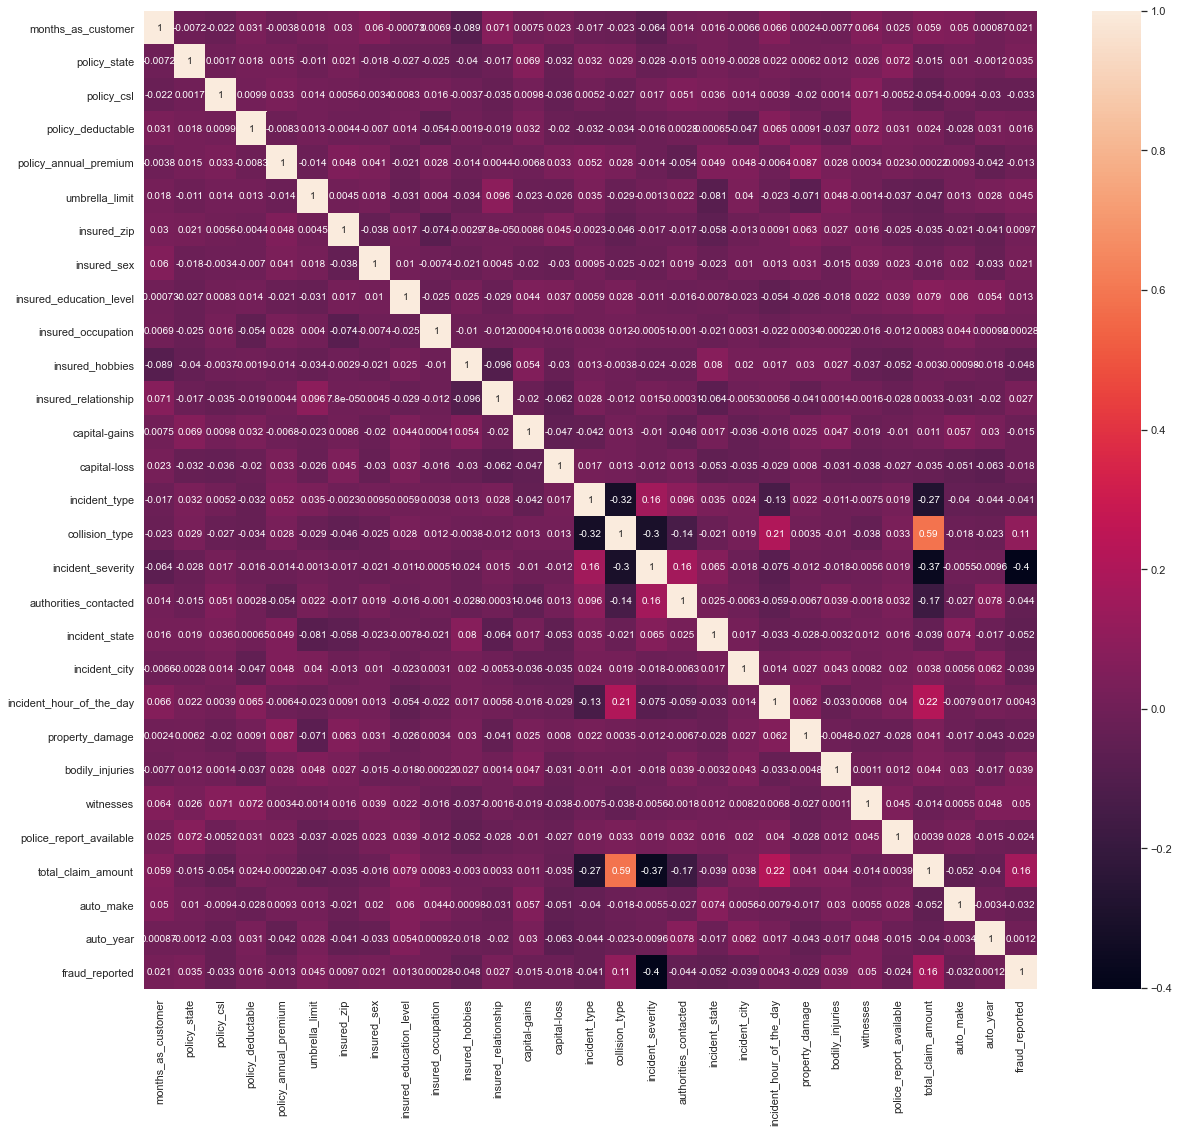

In [54]:
plt.figure(figsize=(20,18))
sns.heatmap(df_new_z.corr(),annot=True);

# Finding the unique value for all columns

In [55]:
for i in df_new_z:
    print(i , len(df_new_z[i].unique()))

months_as_customer 388
policy_state 3
policy_csl 3
policy_deductable 3
policy_annual_premium 971
umbrella_limit 8
insured_zip 975
insured_sex 2
insured_education_level 7
insured_occupation 14
insured_hobbies 20
insured_relationship 6
capital-gains 332
capital-loss 350
incident_type 4
collision_type 4
incident_severity 4
authorities_contacted 5
incident_state 7
incident_city 7
incident_hour_of_the_day 24
property_damage 3
bodily_injuries 3
witnesses 4
police_report_available 3
total_claim_amount 752
auto_make 14
auto_year 21
fraud_reported 2


# Checking VIF 

In [56]:
import statsmodels.api as sm
names = list(df_new_z.drop(columns=["fraud_reported"]))

In [57]:


for index in range(0, len(names)):
            y = df_new_z.loc[:, df_new_z.columns == names[index]]
            x = df_new_z.loc[:, df_new_z.columns != names[index]]
            model = sm.OLS(y, x)                       #Fit ordinary least squares methodhttp://localhost:8888/notebooks/baseball%20predict.ipynb#
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              names [index], (round(rsq, 2))
                    )
            )
            print("Variance Inflation Factor of {} column is {} n".format(
                 names[index], vif)
          )
            print(' ')


R Square value of months_as_customer column is 0.77 keeping all other columns as independent features
Variance Inflation Factor of months_as_customer column is 4.33 n
 
R Square value of policy_state column is 0.61 keeping all other columns as independent features
Variance Inflation Factor of policy_state column is 2.57 n
 
R Square value of policy_csl column is 0.59 keeping all other columns as independent features
Variance Inflation Factor of policy_csl column is 2.43 n
 
R Square value of policy_deductable column is 0.78 keeping all other columns as independent features
Variance Inflation Factor of policy_deductable column is 4.59 n
 
R Square value of policy_annual_premium column is 0.97 keeping all other columns as independent features
Variance Inflation Factor of policy_annual_premium column is 28.98 n
 
R Square value of umbrella_limit column is 0.21 keeping all other columns as independent features
Variance Inflation Factor of umbrella_limit column is 1.26 n
 
R Square value of

# Scalling the data and creating ML

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAcc = 0
maxRs =0
X1 = df_new_z.drop('fraud_reported', axis=1)
y1 = df_new_z['fraud_reported']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X1)


for i in range(1,300):
    x_train,x_test,y_train,y_test =train_test_split(X_scaled,y1,test_size=.20,random_state=i)
    Lr=LogisticRegression()
    Lr.fit(x_train,y_train)
    predrf = Lr.predict(x_test)
    acc=accuracy_score(y_test,predrf)
    if acc>maxAcc :
        maxAcc=acc
        maxRs =i
print("Best accuracy is ",maxAcc," on Random_state ",maxRs)

Best accuracy is  0.8316326530612245  on Random_state  3


In [59]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y1, test_size=0.20, random_state=3)

# Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
Lr = LogisticRegression()
Lr.fit(x_train,y_train)
predlr = Lr.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))


Accuracy  83.16326530612244
[[140  13]
 [ 20  23]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.89       153
           1       0.64      0.53      0.58        43

    accuracy                           0.83       196
   macro avg       0.76      0.72      0.74       196
weighted avg       0.82      0.83      0.83       196



# Decision Tree Classifier

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print("Accuracy ", accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy  82.6530612244898
[[131  22]
 [ 12  31]]
              precision    recall  f1-score   support

           0       0.92      0.86      0.89       153
           1       0.58      0.72      0.65        43

    accuracy                           0.83       196
   macro avg       0.75      0.79      0.77       196
weighted avg       0.84      0.83      0.83       196



# Random Forest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy  80.61224489795919
[[139  14]
 [ 24  19]]
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       153
           1       0.58      0.44      0.50        43

    accuracy                           0.81       196
   macro avg       0.71      0.68      0.69       196
weighted avg       0.79      0.81      0.80       196



# SVC

In [63]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)
predsv = svc.predict(x_test)
print("Accuracy ", accuracy_score(y_test,predsv)*100)
print(confusion_matrix(y_test,predsv))
print(classification_report(y_test,predsv))

Accuracy  79.08163265306123
[[151   2]
 [ 39   4]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       153
           1       0.67      0.09      0.16        43

    accuracy                           0.79       196
   macro avg       0.73      0.54      0.52       196
weighted avg       0.77      0.79      0.72       196



# Cross Validation

In [64]:
from sklearn.model_selection import cross_val_score
scr = cross_val_score(Lr,X1,y1,cv=5)
print("Cross validation score of Logistic Regression model :", scr.mean())

Cross validation score of Logistic Regression model : 0.7571428571428569


In [65]:
scr = cross_val_score(rf,X1,y1,cv=5)
print("Cross validation score of Random forest model :", scr.mean())

Cross validation score of Random forest model : 0.7785714285714286


In [66]:
scr = cross_val_score(svc,X1,y1,cv=5)
print("Cross validation score of SVC model :", scr.mean())

Cross validation score of SVC model : 0.7551020408163265


# Hyper Parameter Tuning

### RandomForest

In [67]:
from sklearn.model_selection import GridSearchCV

parameters= {'max_features' : ['auto','sqrt','log2'],
             'max_depth' : [2,4,6,8,10],
             'criterion': ['gini','entropy']}

In [68]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [69]:
GCV_pred= GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8214285714285714

### SVC

In [70]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

In [71]:
grid = GridSearchCV(SVC(),param_grid,cv=5,scoring="accuracy")
grid.fit(x_train,y_train)
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [72]:
grid_pred= grid.best_estimator_.predict(x_test)
accuracy_score(y_test,grid_pred)

0.8112244897959183

####  Random Forest classification provided the highest accuracy 

# ROC AUC Plot

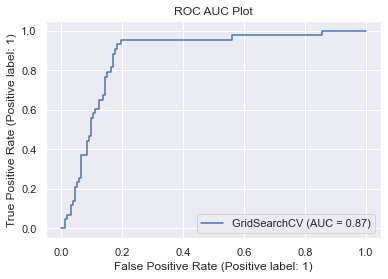

In [73]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

# Conslusion

In [74]:
import numpy as np
a=np.array(y_test)
predicted=np.array(GCV.predict(x_test))
data_com = pd.DataFrame({"Original": a,"Predicted":predicted},index = range(len(a)))
data_com.head(15)

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
5,0,0
6,0,0
7,1,0
8,0,0
9,0,0


# Saving the Model

In [75]:
import pickle
filename = 'Insurance_fraud_prediction.pkl'
pickle.dump(grid,open(filename, 'wb'))